### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd

#### 1. Extracts the results from the observations file 

In [2]:
# Reading the csv file 
#df_observation = pd.read_csv('test_dyn_spinup.demo/observations.dat', skiprows=88, sep=' ')
df_observation = pd.read_csv('test_dyn_spinup_actual.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,264.150176,264.150176,264.150176,264.150175,264.150175,264.150175,264.150175,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,0.0
1.0,86400.0,263.340809,263.749204,263.997248,264.082211,264.139616,264.148858,264.149960,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,1.0
2.0,172800.0,262.729717,263.326311,263.766176,263.939905,264.096406,264.138148,264.146925,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,2.0
3.0,259200.0,262.264697,262.968902,263.539857,263.781473,264.032853,264.117109,264.139490,0.224326,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,3.0
4.0,345600.0,261.760148,262.600059,263.301998,263.608279,263.952977,264.085458,264.126492,0.224325,0.224326,0.224326,0.159498,0.159498,0.159498,0.159498,4.0


In [3]:
len(df_observation)

346

#### Plotting the values 
##### 1. Subsurface temperature

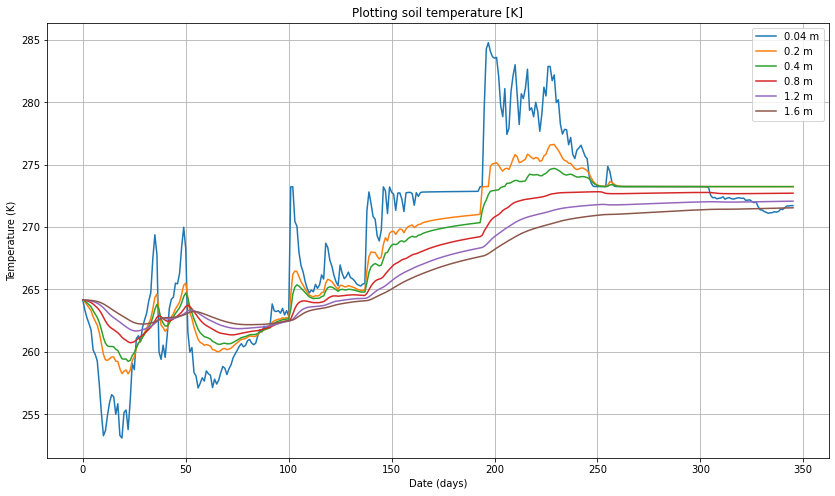

In [4]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
plt.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
plt.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
plt.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
plt.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
plt.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
plt.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')

plt.ylabel('Temperature (K)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
#plt.ylim(264,266)
plt.grid(True)

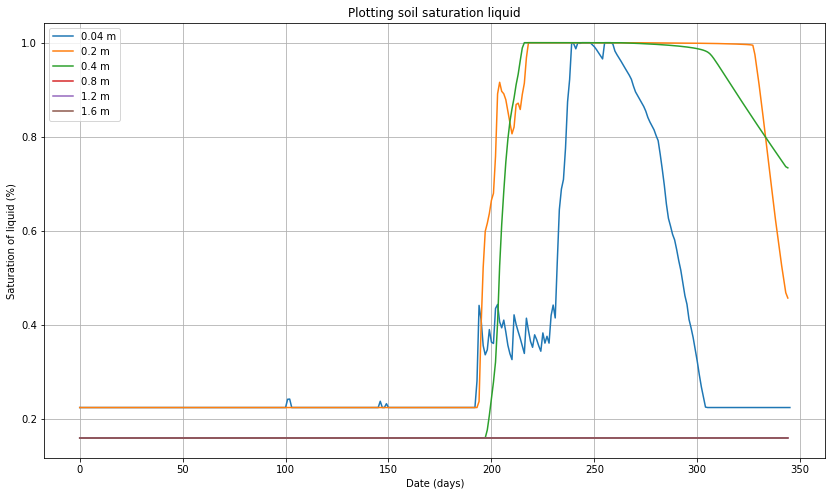

In [5]:
plt.figure(figsize=(14,8))
plt.title('Plotting soil saturation liquid')
#plt.plot(df_observation['point -0.01 saturation liquid'],label='0.01 m')
plt.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
plt.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
plt.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
plt.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
plt.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
plt.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')

plt.ylabel('Saturation of liquid (%)')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xlabel('Date (days)')
plt.legend()
plt.grid(True)